# Creation of a pipeline for sentiment analysis using textblob
we will download tweets using Vicinitas to evade every problem with Twitter API.
Then we construct functions to operate sentiment analysis in an automated way.

In [128]:
import pandas as pd
import re
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
#import of google 3000 tweets dataset
df_google_tweets = pd.read_excel('data/@Google_user_tweets.xlsx')
df_google_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweet Id     3200 non-null   int64 
 1   Text         3200 non-null   object
 2   Name         3200 non-null   object
 3   Screen Name  3200 non-null   object
 4   UTC          3200 non-null   object
 5   Created At   3200 non-null   object
 6   Favorites    3200 non-null   int64 
 7   Retweets     3200 non-null   int64 
 8   Language     3200 non-null   object
 9   Client       3200 non-null   object
 10  Tweet Type   3200 non-null   object
 11  URLs         1277 non-null   object
 12  Hashtags     3200 non-null   int64 
 13  Mentions     3200 non-null   int64 
 14  Media Type   56 non-null     object
 15  Media URLs   56 non-null     object
 16  Unnamed: 16  7 non-null      object
 17  Unnamed: 17  5 non-null      object
 18  Unnamed: 18  2 non-null      object
dtypes: int64(5), object(14)
mem

## Creation of the pipeline
### Cleaning of the text of every tweets

The textblob package offer a sentiment analysis tool that enable sentiment polarisation analysis.
If the result is near 0 it's a neutral tweet, if the is near 1 it's a happy tweet, below 0 it's a sad tweet.

In [110]:
#use of regex for pipeline for datacleaning of tweets
def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    return text

#Use of textblob in an automated way
def pipeline_for_sentiment_analysis(input_dataframe):
    corpus = input_dataframe['Text']
    corpus_clean = corpus.apply(nlp_pipeline)

    polarity_sentiment_list = []

    for item in corpus_clean:
        polarity_sentiment_list.append(TextBlob(item).sentiment[0])

    return {'average': np.mean(polarity_sentiment_list), 'median': np.median(polarity_sentiment_list), 'count': len(polarity_sentiment_list), 'polarity_sentiment_list': polarity_sentiment_list}

In [111]:
#try of the function
result_google = pipeline_for_sentiment_analysis(df_google_tweets)
print('Average:', result_google['average'], ';','Median:', result_google['median'], ';','Count:', result_google['count'])

Average: 0.09933195158429534 ; Median: 0.0 ; Count: 3200


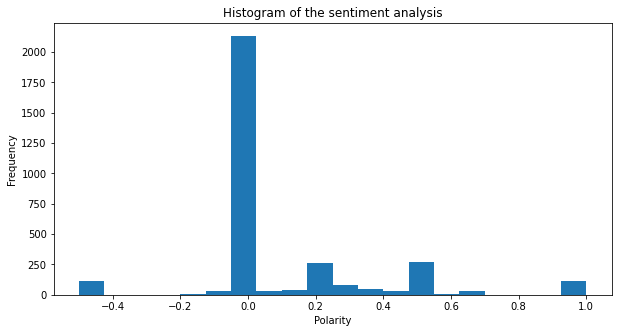

In [112]:
# plot a histogram of the sentiment analysis

plt.figure(figsize=(10,5))
plt.hist(result_google['polarity_sentiment_list'], bins=20)
plt .xlabel('Polarity')
plt .ylabel('Frequency')
plt .title('Histogram of the sentiment analysis')
plt.show()

### Application of the pipeline

Now that we have done it for one dataset we apply the pipeline for the other datasets.

In [113]:
#Application of the pipeline to the two other datasets
df_amazon_tweet = pd.read_excel('data/@amazon_user_tweets.xlsx')
df_microsoft_tweet = pd.read_excel('data/@Microsoft_user_tweets.xlsx')
df_netflix_tweet = pd.read_excel('data/@netflix_user_tweets.xlsx')

result_amazon = pipeline_for_sentiment_analysis(df_amazon_tweet)
result_microsoft = pipeline_for_sentiment_analysis(df_microsoft_tweet)
result_netflix = pipeline_for_sentiment_analysis(df_netflix_tweet)

In [114]:
#Statistics of all datasets
df_results = pd.DataFrame({'Amazon': [result_amazon['average'], result_amazon['median'], result_amazon['count']], 'Google':[result_google['average'],result_google['median'],result_google['count']],'Microsoft': [result_microsoft['average'], result_microsoft['median'], result_microsoft['count']], 'Netflix':[result_netflix['average'],result_netflix['median'],result_netflix['count']]})
df_results.index = ['Average', 'Median', 'Count']

df_results

,Amazon,Google,Microsoft,Netflix
Average,0.247589,0.099332,0.115745,0.140711
Median,0.250000,0.000000,0.000000,0.000000
Count,3200.000000,3200.000000,3200.000000,3165.000000


We can see that the average of the sentiment analysis is different for every Twitter account.
But the median is very close to 0. This can be the effect of an important number of tweets that are neutral.

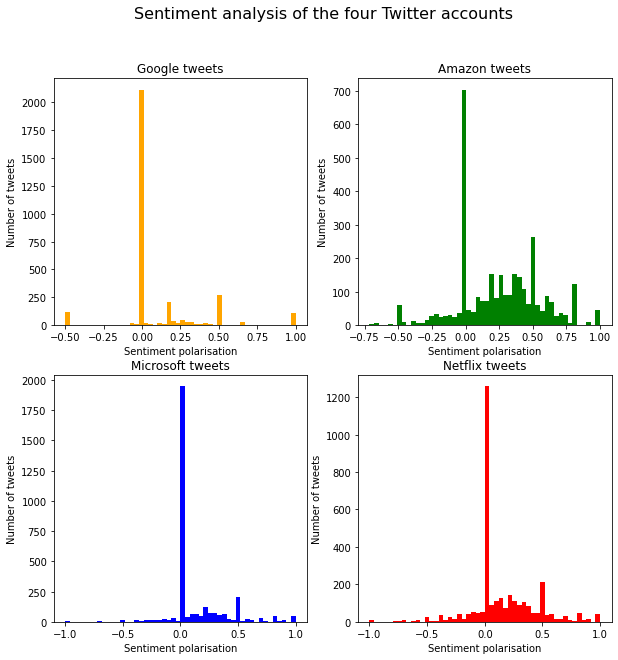

In [130]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Sentiment analysis of the four Twitter accounts', fontsize=16)

ax1.hist(result_google['polarity_sentiment_list'], bins=50, label='Google tweets', color='orange')
ax1.set_title('Google tweets')
ax2.hist(result_amazon['polarity_sentiment_list'], bins=50, label='Amazon tweets', color='green')
ax2.set_title('Amazon tweets')
ax3.hist(result_microsoft['polarity_sentiment_list'], bins=50, label='Microsoft tweets', color='blue')
ax3.set_title('Microsoft tweets')
ax4.hist(result_netflix['polarity_sentiment_list'], bins=50, label='Netflix tweets', color='red')
ax4.set_title('Netflix tweets')

for ax in fig.get_axes():
    ax.set(xlabel='Sentiment polarisation', ylabel='Number of tweets')

We can see that the sentiment analysis of the Google tweets is very different from the other three.
The neutral polarisation is the most common polarisation. Extreme values are different for every Twitter account.

## observation without main frequency
Investigation of every dataset without the main frequency of the tweets may bring new information.

In [139]:
#adding Nan values to netflix polarization to get 3200 tweets as others accounts
temp_df = result_netflix['polarity_sentiment_list']

for i in range(3200 - len(temp_df)):
    temp_df.append(np.nan)

len(temp_df)

3200

In [140]:
# creation of a new dataframe with the polarisation of every twitter account
df_polarisation = pd.DataFrame({'Amazon': result_amazon['polarity_sentiment_list'], 'Google': result_google['polarity_sentiment_list'], 'Microsoft': result_microsoft['polarity_sentiment_list'], 'Netflix': temp_df})
df_polarisation

,Amazon,Google,Microsoft,Netflix
0,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.000000,0.00000,0.000000
3,0.300000,0.000000,1.00000,-0.445833
4,0.243182,0.000000,0.00000,-0.125000
...,...,...,...,...
3195,0.000000,0.000000,0.00000,NaN
3196,0.000000,0.500000,0.00000,NaN
3197,1.000000,0.000000,0.80000,NaN
3198,0.000000,0.000000,0.53125,NaN


In [146]:
#replace the 0 by nan to delete the neutral polarisation
df_polarisation = df_polarisation.round(decimals = 2)
df_polarisation.replace(0, np.nan, inplace=True)

#new statistics emerges
df_polarisation.describe()

,Amazon,Google,Microsoft,Netflix
count,2509.000000,1093.000000,1265.000000,1953.000000
mean,0.315863,0.291006,0.293107,0.228167
std,0.316421,0.384635,0.337284,0.332473
min,-0.710000,-0.500000,-1.000000,-1.000000
25%,0.160000,0.180000,0.130000,0.050000
50%,0.350000,0.270000,0.290000,0.230000
75%,0.500000,0.500000,0.500000,0.470000
max,1.000000,1.000000,1.000000,1.000000


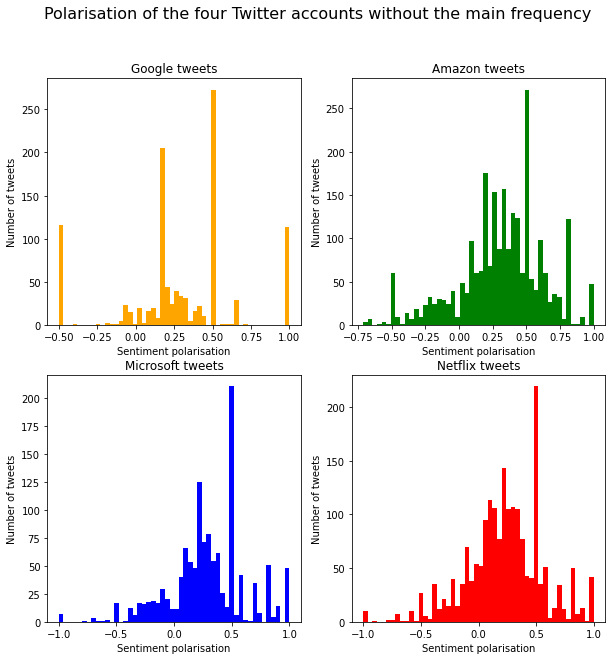

In [147]:
#plot the polarisation of the four accounts without the main frequency
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Polarisation of the four Twitter accounts without the main frequency', fontsize=16)

ax1.hist(df_polarisation['Google'], bins=50, label='Google tweets', color='orange')
ax1.set_title('Google tweets')
ax2.hist(df_polarisation['Amazon'], bins=50, label='Amazon tweets', color='green')
ax2.set_title('Amazon tweets')
ax3.hist(df_polarisation['Microsoft'], bins=50, label='Microsoft tweets', color='blue')
ax3.set_title('Microsoft tweets')
ax4.hist(df_polarisation['Netflix'], bins=50, label='Netflix tweets', color='red')
ax4.set_title('Netflix tweets')

for ax in fig.get_axes():
    ax.set(xlabel='Sentiment polarisation', ylabel='Number of tweets')